# Toxic comment classification - Preprocessing and understanding

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
plt.style.use('seaborn')
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

import spacy
from src.text_processing import remove_stopwords

from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
def normalize_comment(comment):
    words = RegexpTokenizer(r'\w+').tokenize(comment)
    words = remove_stopwords(words, stop = stopwords.words('english'))
    
    return ' '.join(words)

In [3]:
train = pd.read_csv('../data/raw/train.csv', index_col='id')
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train.shape

(159571, 7)

In [5]:
train['comment_text_processed'] = train['comment_text'].apply(lambda x: normalize_comment(x))

In [6]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_processed
id,,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why edits made username Hardcore M...
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches background colour I seemingly...
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I really trying edit war It guy consta...
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I make real suggestions improvement I won...
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir hero Any chance remember page


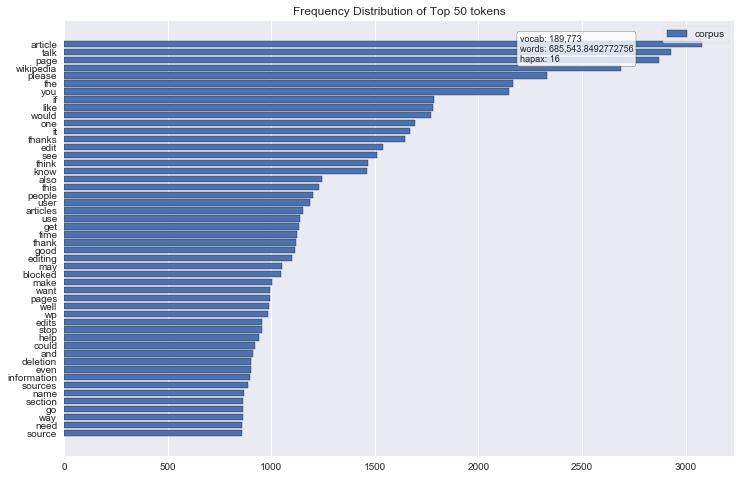

In [19]:
vectorizer = TfidfVectorizer()
docs       = vectorizer.fit_transform(train['comment_text_processed'])
features   = vectorizer.get_feature_names()

fig, ax = plt.subplots(figsize=(12,8))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof(ax=ax)

In [20]:
df = train[train.threat == 1]

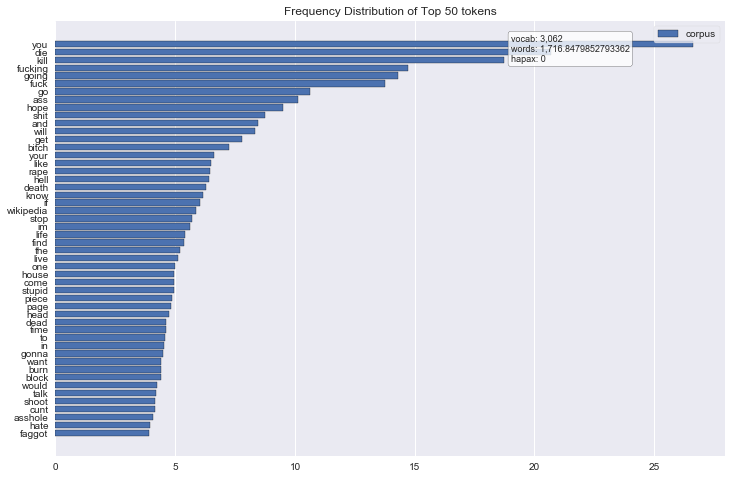

In [21]:
vectorizer = TfidfVectorizer()
docs       = vectorizer.fit_transform(df['comment_text_processed'])
features   = vectorizer.get_feature_names()

fig, ax = plt.subplots(figsize=(12,8))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof(ax=ax)

In [24]:
X = TfidfVectorizer().fit_transform(train['comment_text_processed'])
y_vec = train.drop(['comment_text', 'comment_text_processed'], 1)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y_vec)

In [42]:
clf = RandomForestClassifier()
clf.fit(X_train, np.array(y_train['toxic']).ravel())
pred = clf.predict(X_test)
print(classification_report(np.array(y_test['toxic']).ravel(), pred))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97     36059
          1       0.91      0.49      0.64      3834

avg / total       0.94      0.95      0.94     39893

